Visualization #1: Non Regulated Lead Sample

    The City's Residential Lead Testing Program is a non-regulated program provided free of charge to residents concerned about the possibility of lead in their tap drinking water.
    Residents can pick up and drop off a water sample kit at one of six Toronto Public Health locations. While each kit contains detailed instructions on how to obtain an accurate tap water sample, the City of Toronto has no control over how or where a sample is obtained. Toronto Water provides lead test results to all residents who submit a test.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [ ]:
#Import csv file
def import_csv_with_pandas(file_path):
    """Imports a CSV file using pandas."""
    df = pd.read_csv(file_path)
    return df

file_path = 'Non Regulated Lead Samples.csv'
df = import_csv_with_pandas(file_path)
print(df)

         _id  Sample Number Sample Date PartialPostalCode Lead Amount (ppm)
0          1        1536645  2014-01-01               M4E            0.0078
1          2        1535456  2014-01-02               M4K           0.00011
2          3        1536641  2014-01-03               M1L          0.000092
3          4        1548101  2014-01-06               M3B           0.00019
4          5        1540991  2014-01-06               M6H             0.012
...      ...            ...         ...               ...               ...
13663  13664        3392229  2025-03-11               M4C          0.000420
13664  13665        3392234  2025-03-12               M4J          0.000210
13665  13666        3392237  2025-03-12               M6J           0.00128
13666  13667        3392239  2025-03-13               M6J           0.00005
13667  13668        3392241  2025-03-13               M6J          <0.00005

[13668 rows x 5 columns]


In [ ]:
#Convert "Sample Date" to datetime
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')

In [14]:
df_2024 = df[df['Sample Date'].dt.year == 2024]


In [16]:
#replace <0.00005 to 0.00005 in column Lead Amount (ppm)
df_2024['Lead Amount (ppm)'] = df_2024['Lead Amount (ppm)'].replace(
    to_replace=r'<', value='', regex=True
).astype(float)

C:\Users\tiann\AppData\Local\Temp\ipykernel_29364\3163674609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Lead Amount (ppm)'] = df_2024['Lead Amount (ppm)'].replace(


In [17]:
df_2024['Month'] = df_2024['Sample Date'].dt.month
monthly_totals = df_2024.groupby('Month')['Lead Amount (ppm)'].sum().sort_index()


C:\Users\tiann\AppData\Local\Temp\ipykernel_29364\1641738521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Month'] = df_2024['Sample Date'].dt.month


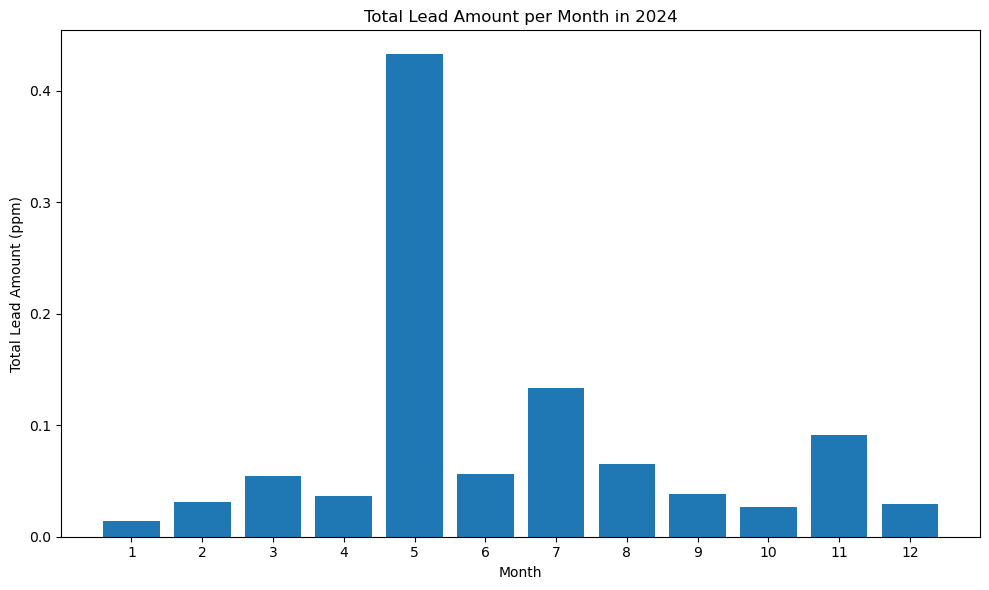

In [ ]:
#Plot total lead amonut per month in 2024


plt.figure(figsize=(10, 6))
plt.bar(monthly_totals.index, monthly_totals.values)
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Total Lead Amount (ppm)')
plt.title('Total Lead Amount per Month in 2024')
plt.tight_layout()
plt.show()


    > What software did you use to create your data visualization?
    The software I used is python
    > Who is your intended audience? 
    The intended audience is residents concerned about the possibility of lead in their tap drinking water.
    > What information or message are you trying to convey with your visualization? 
    The information I want to convey is which months had higher or lower total lead levels in the year 2024.
    > What aspects of design did you consider when making your visualization? How did you apply them? With what elements of your plots? 
    Since the data file has data spanning from 2014-01 to 2025, it is difficult to plot the lead amount for all the entrance. So I only ploted the sum of lead amount breaking down by each month in year 2024.
    > How did you ensure that your data visualizations are reproducible? If the tool you used to make your data visualization is not reproducible, how will this impact your data visualization? 
    Use another software to reproduce the data. If not reproducible, then plot is not reliable.
    > How did you ensure that your data visualization is accessible?  
    By commenting on the code and writing down all codes used to create the plot.
    > Who are the individuals and communities who might be impacted by your visualization?  
    Residents who are concerned about the months that has the highest possibility of lead in their tap drinking water. 
    > How did you choose which features of your chosen dataset to include or exclude from your visualization? 
    I chose based on the data type, the information of the most interest (lead amounnt).
    What ‘underwater labour’ contributed to your final data visualization product?
    Handled inconsistent values like "<0.00005" in the Lead Amount (ppm) column by converting them to usable numeric values.